In [1]:
from gundong_class import gundong_class
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import matplotlib.dates as mdate
from matplotlib.pylab import rcParams
plt.rcParams['axes.unicode_minus']=False
rcParams['font.sans-serif'] = 'kaiti'

path_data='stock.csv' # 读取包含收益率和流动性的文件
data = pd.read_csv(path_data, index_col=0)

path_yield='yield.csv' # 读取只含收益率的文件
yield_data = pd.read_csv(path_yield, index_col=0)

In [2]:
gundong_time=360 # 滚动窗口时间
k_lag = 3

gundong_data = gundong_class(data, gundong_time, k_lag)
gundong_yield = gundong_class(yield_data, gundong_time, k_lag)


gundong_data.VAR()
gundong_data.cal_overflow(predict_time=10)

gundong_yield.VAR()
gundong_yield.cal_overflow(predict_time=10)


l.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\asus\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\asus\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\asus\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informati

In [3]:
data_xishu = gundong_data.get_data_xishu()
yield_xishu = gundong_yield.get_data_xishu()

data_time = gundong_data.data_time()

In [5]:
length = yield_xishu.shape[1]
# yield 对 yield 的求和
yield_to_yield = data_xishu[:, 0:length, 0:length]
yield_to_yield_sum = yield_to_yield.sum(axis=1)
yield_to_yield_sum = yield_to_yield_sum.sum(axis=1)

# yield 对 amihud 的求和
yield_to_amihud = data_xishu[:, length:2*length, 0:length]
yield_to_amihud_sum = yield_to_amihud.sum(axis=1)
yield_to_amihud_sum = yield_to_amihud_sum.sum(axis=1)

# amihud 对 yield 的求和
amihud_to_yield = data_xishu[:, 0:length, length:2*length]
amihud_to_yield_sum = amihud_to_yield.sum(axis=1)
amihud_to_yield_sum = amihud_to_yield_sum.sum(axis=1)

# 原始的 yield 的求和
yield_sum = yield_xishu.sum(axis=1)
yield_sum = yield_sum.sum(axis=1)

In [6]:
yield_sum

array([454.48244721, 454.5110378 , 454.81042   , 454.88629988,
       454.61295157, 454.79378432, 454.84165287, 455.00031944,
       455.20492141, 455.62842569, 455.82480351, 456.02820084,
       456.19170075, 456.28589845, 456.61834968, 456.53514892,
       456.48587515, 456.60595678, 456.74632221, 456.79984894,
       456.75600318, 456.83416593, 457.3979259 , 457.57488256,
       457.44810376, 457.36736068, 457.44374764, 457.75995961,
       457.91479242, 457.84934765, 457.46127363, 457.45246989,
       457.32567731, 457.30586655, 457.09951739, 457.15064638,
       457.29113988, 457.08849734, 457.25282022, 457.14638222,
       457.18874354, 457.16717652, 457.17078806, 457.07316304,
       456.93412141, 456.925565  , 456.93680197, 456.93472814,
       457.04513084, 457.21609322, 457.16592305, 457.3686346 ,
       457.09849367, 457.11645606, 457.10938375, 457.15312657,
       457.39370104, 457.51805639, 457.53338492, 457.65464112,
       457.631803  , 457.55126752, 457.4463804 , 456.54

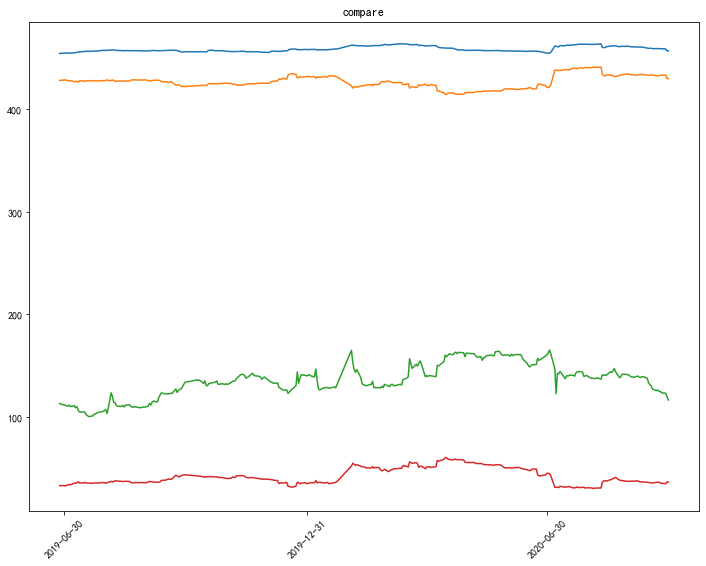

In [8]:
plot_data = pd.DataFrame(columns=['yield'])
plot_data['yield'] = yield_sum
plot_data['yield_to_yield'] = yield_to_yield_sum
plot_data['yield_to_amihud'] = yield_to_amihud_sum
plot_data['amihud_to_yield'] = amihud_to_yield_sum
plot_data.index = pd.to_datetime(data_time)


time = plot_data.index
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range(time[0],time[-1],freq='6M'),rotation=45)
plt.title('compare')
column_list = [columns for columns in plot_data]
for name in column_list:
    ax.plot(time, plot_data[name],label=name)
plt.show()